In [ ]:
pip install python-louvain

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import math as math
import numpy as np
import community as com
import matplotlib.cm as cm
import itertools

In [ ]:
path='stack-overflow-developer-survey-2021'
public=pd.read_csv(path+'/survey_results_public.csv')

#public=pd.read_csv('./developer_survey_2021/survey_results_public.csv')


# Código

In [2]:
"""
G = nx.Graph()
for a in range(len(public)):
    nodoLenguaje = public.to_numpy()[a][26]
    
    if str(nodoLenguaje) != "nan":
        listaLenguajes = nodoLenguaje.split(';')

        # Mejor utiizar itertools.combinations() para generar combinaciones de dos elementos de una lista
        for e in itertools.combinations(listaLenguajes,2): # e es una tupla de dos lenguajes
            if G.has_edge(e[0],e[1]):
                G.edges[e[0],e[1]]['weight']+=1 # Incrementamos peso
            else:
                G.add_edge(e[0],e[1],weight=1) # Añadimos nuevo enlace y/o nodos

#Guardar grafo
nx.write_graphml(G, "grafoCompleto.graphml")
"""

#Cargar grafo
g = nx.read_graphml("grafoCompleto.graphml")
print(g.nodes,g.number_of_nodes())

['Docker', 'Git', 'Yarn', 'Kubernetes', 'Terraform', 'Unity 3D', 'Flow', 'Unreal Engine', 'Ansible', 'Deno', 'Puppet', 'Xamarin', 'Chef', 'Pulumi'] 14


### Poda del grafo

In [3]:
G = nx.Graph()
for e in itertools.combinations(g.nodes(),2): # e es una tupla de dos lenguajes
    peso = g.edges[e[0],e[1]]['weight']
    if peso > 325:
        G.add_edge(e[0],e[1],weight=peso)

print(G.nodes,G.number_of_nodes())

['Docker', 'Git', 'Yarn', 'Kubernetes', 'Terraform', 'Unity 3D', 'Flow', 'Unreal Engine', 'Ansible', 'Deno', 'Puppet', 'Xamarin', 'Chef', 'Pulumi'] 14


# Estudio del grafo

In [4]:
nx.degree(G)

DegreeView({'Docker': 12, 'Git': 13, 'Yarn': 11, 'Kubernetes': 11, 'Terraform': 7, 'Unity 3D': 7, 'Flow': 3, 'Unreal Engine': 5, 'Ansible': 8, 'Deno': 4, 'Puppet': 6, 'Xamarin': 5, 'Chef': 5, 'Pulumi': 1})

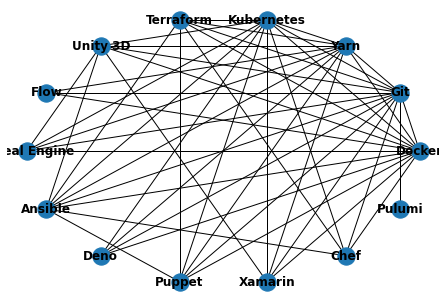

In [5]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
#labels = nx.get_edge_attributes(G, 'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [6]:
"""
La densidad de un grafo es una propiedad que determina la proporción de aristas que posee. 
Un grafo denso es un grafo en el que el número de aristas es cercano al número máximo de aristas posibles, es decir, 
a las que tendría si el grafo fuera completo.
#https://es.wikipedia.org/wiki/Densidad_(teor%C3%ADa_de_grafos)
"""
#Equivale al numero de arcos de G (49) sobre g (91)
#G.number_of_edges()/g.number_of_edges()
nx.density(G)

0.5384615384615384

### Comunidades

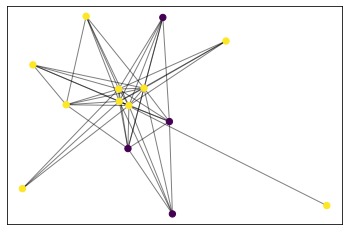

In [7]:
#first compute the best partition
partition = com.best_partition(G)

#nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=list(partition.values()))

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [8]:
partition

{'Docker': 1,
 'Git': 1,
 'Yarn': 1,
 'Kubernetes': 1,
 'Terraform': 0,
 'Unity 3D': 1,
 'Flow': 1,
 'Unreal Engine': 1,
 'Ansible': 0,
 'Deno': 1,
 'Puppet': 0,
 'Xamarin': 1,
 'Chef': 0,
 'Pulumi': 1}

### Transitividad

In [9]:
nx.transitivity(G)

0.6666666666666666

In [10]:
nx.average_clustering(G)

0.7707375957375957

In [11]:
#PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links.
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank
nx.pagerank(G)

{'Docker': 0.22040227654606973,
 'Git': 0.2652659725660915,
 'Yarn': 0.0986640181668504,
 'Kubernetes': 0.10955126369903413,
 'Terraform': 0.05938549027506579,
 'Unity 3D': 0.05034305726145276,
 'Flow': 0.01546679702191777,
 'Unreal Engine': 0.02621202976843169,
 'Ansible': 0.05818837140067641,
 'Deno': 0.01755534326272263,
 'Puppet': 0.02228413464255611,
 'Xamarin': 0.025865879911346982,
 'Chef': 0.019199262380175233,
 'Pulumi': 0.011616103097609022}

In [12]:
nx.degree_centrality(G)

{'Docker': 0.9230769230769231,
 'Git': 1.0,
 'Yarn': 0.8461538461538463,
 'Kubernetes': 0.8461538461538463,
 'Terraform': 0.5384615384615385,
 'Unity 3D': 0.5384615384615385,
 'Flow': 0.23076923076923078,
 'Unreal Engine': 0.38461538461538464,
 'Ansible': 0.6153846153846154,
 'Deno': 0.3076923076923077,
 'Puppet': 0.46153846153846156,
 'Xamarin': 0.38461538461538464,
 'Chef': 0.38461538461538464,
 'Pulumi': 0.07692307692307693}

In [13]:
#Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph.
#https://neo4j.com/docs/graph-data-science/1.8/algorithms/betweenness-centrality/
nx.betweenness_centrality(G)

{'Docker': 0.10662393162393159,
 'Git': 0.2604700854700855,
 'Yarn': 0.07905982905982904,
 'Kubernetes': 0.06602564102564101,
 'Terraform': 0.005128205128205128,
 'Unity 3D': 0.007692307692307694,
 'Flow': 0.0,
 'Unreal Engine': 0.0,
 'Ansible': 0.013461538461538462,
 'Deno': 0.0,
 'Puppet': 0.0,
 'Xamarin': 0.0,
 'Chef': 0.0,
 'Pulumi': 0.0}

In [14]:
#Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph.
#https://neo4j.com/docs/graph-data-science/1.8/algorithms/closeness-centrality/
nx.closeness_centrality(G)

{'Docker': 0.9285714285714286,
 'Git': 1.0,
 'Yarn': 0.8666666666666667,
 'Kubernetes': 0.8666666666666667,
 'Terraform': 0.6842105263157895,
 'Unity 3D': 0.6842105263157895,
 'Flow': 0.5652173913043478,
 'Unreal Engine': 0.6190476190476191,
 'Ansible': 0.7222222222222222,
 'Deno': 0.5909090909090909,
 'Puppet': 0.65,
 'Xamarin': 0.6190476190476191,
 'Chef': 0.6190476190476191,
 'Pulumi': 0.52}

In [15]:
"""
Eigenvector Centrality is an algorithm that measures the transitive influence of nodes. 
Relationships originating from high-scoring nodes contribute more to the score of a node than connections from 
low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.
"""
#https://neo4j.com/docs/graph-data-science/1.8/algorithms/eigenvector-centrality/
nx.eigenvector_centrality(G)

{'Docker': 0.3731694242972743,
 'Git': 0.378102029421062,
 'Yarn': 0.3513678088145499,
 'Kubernetes': 0.35878471527109557,
 'Terraform': 0.2663814144795854,
 'Unity 3D': 0.2627948537677635,
 'Flow': 0.13333931086241538,
 'Unreal Engine': 0.20850516114331288,
 'Ansible': 0.29473202119119296,
 'Deno': 0.1767261722599346,
 'Puppet': 0.24457979899686094,
 'Xamarin': 0.20850516114331288,
 'Chef': 0.20208980836478713,
 'Pulumi': 0.045722912414175094}

In [94]:
degree=np.array([d[1] for d in G.degree()])
gradoMed=0
cont=0
for i in degree:
    gradoMed+=i
    cont+=1
gradoMed=gradoMed/cont
print(len(G.edges())/len(G.nodes()))
print("El grado medio es:",gradoMed)
print("El máximo grado es:",degree.max())
print("El mínimo grado es:",degree.min())

3.5
El grado medio es: 7.0
El máximo grado es: 13
El mínimo grado es: 1


In [132]:
#plt.hist(degree)
#plt.xlabel('degree')
#plt.ylabel('number of lenguages')
#plt.title('degree distribution')
#plt.savefig("Histograma.jpg")

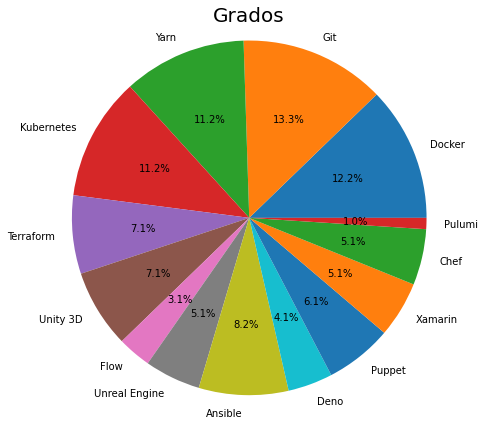

In [129]:
#https://numython.github.io/posts/graficas-de-pastel-con-matplotlib/
#https://www.delftstack.com/es/howto/matplotlib/how-to-set-the-figure-title-and-axes-labels-font-size-in-matplotlib/
lista = list()
for d in G.degree():
    lista.append(d[1])
fig=plt.figure(figsize=(7,7))
plt.pie(lista, labels=G.nodes(), autopct='%1.1f%%')
plt.title('Grados', fontsize = 20)
plt.axis("equal")
plt.savefig("GraficoSectores.jpg")

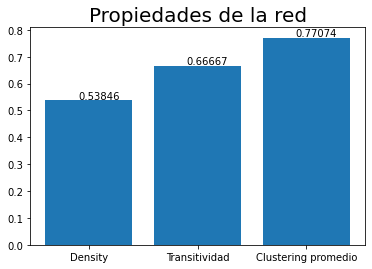

In [134]:
eje_x = ['Density', 'Transitividad', 'Clustering promedio']
eje_y = [round(nx.density(G),5), round(nx.transitivity(G),5), round(nx.average_clustering(G),5)]
plt.title('Propiedades de la red', fontsize = 20)
plt.bar(eje_x, eje_y)
j = 0.005
for i in range(len(eje_x)):
    plt.annotate(eje_y[i], (-0.1 + i, eje_y[i] + j))
plt.savefig("histograma.jpg")

In [135]:
def calculaModularidad(G, particion):
    valor = 0
    i=0
    lista = []
    for i in particion:
        for j in i:
            lista.append(j)
    
    if len(lista)==len(G.nodes()) and len(particion)==1:
        return 0
    elif len(lista) == 1:
        valor = -1/math.pow(2*len(G.edges()),2)
        suma=0
        for i in lista:
            suma+=math.pow(G.degree(i),2)
        resultado = round(suma*valor , 5)
        return resultado
    else:
        suma=0
        x=0
        for i in particion:
            long=len(i)
            valA = long/len(G.edges())
            se = set()
            for j in i:
                se.add(j[0])
                se.add(j[1])
            
            su=0
            for s in se:
                su+=G.degree(s)
            valB=su/(2*len(G.edges()))
            
            valB = math.pow(valB,2)
            x = valA - valB
            suma+=x
        return round(suma, 5)

In [136]:
for nodo in G.nodes():
    print("La modularidad correspondiente al nodo", nodo ,"es:",calculaModularidad(G,[{nodo}]))

La modularidad correspondiente al nodo Docker es: -0.01499
La modularidad correspondiente al nodo Git es: -0.0176
La modularidad correspondiente al nodo Yarn es: -0.0126
La modularidad correspondiente al nodo Kubernetes es: -0.0126
La modularidad correspondiente al nodo Terraform es: -0.0051
La modularidad correspondiente al nodo Unity 3D es: -0.0051
La modularidad correspondiente al nodo Flow es: -0.00094
La modularidad correspondiente al nodo Unreal Engine es: -0.0026
La modularidad correspondiente al nodo Ansible es: -0.00666
La modularidad correspondiente al nodo Deno es: -0.00167
La modularidad correspondiente al nodo Puppet es: -0.00375
La modularidad correspondiente al nodo Xamarin es: -0.0026
La modularidad correspondiente al nodo Chef es: -0.0026
La modularidad correspondiente al nodo Pulumi es: -0.0001


In [137]:
pesos = dict()
for edge in G.edges():
    peso = G[edge[0]][edge[1]]['weight']
    pesos[edge] = peso
    
maxi= 0
for i in pesos:
    if pesos[i]>maxi:
        maxi = pesos[i]

In [138]:
#https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/02-Making-Network-Viz-with-Bokeh.html
#https://realpython.com/python-data-visualization-bokeh/
#https://docs.bokeh.org/en/latest/docs/user_guide.html

from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Spectral8
from bokeh.transform import linear_cmap
from networkx.algorithms import community


edges = dict(nx.degree(G))
nx.set_node_attributes(G, name='edge', values=edges)

number_to_adjust_by = 5
adjusted_node_size = dict([(node, edge+number_to_adjust_by) for node, edge in nx.degree(G)])
nx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

#Crear lista de lista formadas por las comunidades calculadas antes (partition)
partOrd = sorted(partition.items(), key=lambda x: x[1])
comunidades = list()
i=0

while i <= partOrd[len(partOrd)-1][1]:
    listaNueva = list()
    comunidades.append(listaNueva)
    i+=1

for p in partOrd:
    comunidades[p[1]].append(p[0])


# Create empty dictionaries
communityNumber = {}
modularity_color = {}
modularity = {}
pagerank = nx.pagerank(G)
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
eigenvector = nx.eigenvector_centrality(G)

#Loop through each community in the network
for community_number, community in enumerate(comunidades):
    #For each member of the community, add their community number and a distinct color
    for name in community: 
        communityNumber[name] = community_number
        modularity_color[name] = Spectral8[community_number]
        modularity[name] = calculaModularidad(G,[{name}])
        

#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

nx.set_node_attributes(G, modularity, 'modularity')
nx.set_node_attributes(G, pagerank, 'pagerank')
nx.set_node_attributes(G, degree, 'degree')
nx.set_node_attributes(G, betweenness, 'betweenness')
nx.set_node_attributes(G, closeness, 'closeness')
nx.set_node_attributes(G, eigenvector, 'eigenvector')
nx.set_node_attributes(G, communityNumber, 'communityNumber')
nx.set_node_attributes(G, modularity_color, 'modularity_color')

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'modularity_color'

#Choose a title!
title = 'Technologies That I worked With Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
    ("Character", "@index"),
    ("Edges", "@edge"),
    ("Modularity", "@modularity"),
    ("Pagerank", "@pagerank"),
    ("Degree", "@degree"),
    ("Betweenness", "@betweenness"),
    ("Closeness", "@closeness"),
    ("Eigenvector", "@eigenvector"),
    ("CommunityNumber", "@communityNumber"),
    ("Modularity Color", "$color[swatch]:modularity_color"),
]

#Crear grafo 
grafo = figure(tooltips = HOVER_TOOLTIPS,tools="pan,wheel_zoom,save,reset", 
              active_scroll='wheel_zoom',x_range=Range1d(-12, 12), y_range=Range1d(-12, 12), title=title)

network_graph = from_networkx(G, nx.circular_layout, scale=10, center=(0, 0))

#Establecer los tamaños y colores de los nodos según su grado
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)

#Resaltar nodos seleccionado
network_graph.node_renderer.hover_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)
network_graph.node_renderer.selection_glyph = Circle(size=size_by_this_attribute, fill_color=node_highlight_color, line_width=2)

#Opacidad de los enlaces
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)

#Resaltar enlaces conectados sobre nodo seleccionado
network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

#Representación de nodos y enlaces
network_graph.selection_policy = NodesAndLinkedEdges()
network_graph.inspection_policy = NodesAndLinkedEdges()

grafo.renderers.append(network_graph)

#Añadir etiquetas de nombre a los nodos
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
grafo.renderers.append(labels)

#Mostrar grafo
#show(grafo)

#save(grafo, filename=f"{title}.html")

In [159]:
#https://programminghistorian.org/es/lecciones/crear-y-ver-archivos-html-con-python
#https://docs.python.org/es/3/library/webbrowser.html
#https://www.geeksforgeeks.org/creating-and-viewing-html-files-with-python/
#https://www.geeksforgeeks.org/how-to-write-to-an-html-file-in-python/
#https://pandas.pydata.org/docs/user_guide/index.html
#https://networkx.org/documentation/stable/tutorial.html
#https://www.ellaberintodefalken.com/2020/02/grafos-con-networkx.html //guardar grafos para no cargarlos desde 0
#https://www.codegrepper.com/code-examples/python/frameworks/file-path-in-python/networkx+draw+graph+with+weight //peso de los arcos
#https://www.delftstack.com/es/howto/python/how-to-sort-a-dictionary-by-value/ //ordenar diccionario por valor
#https://es.stackoverflow.com/questions/151744/guardar-gr%C3%A1fica-completa-utilizando-matplotlib-en-python //guardar graficos en jpg
#https://www.htmlquick.com/es/tutorials/tables.html //tablas html

import webbrowser

f = open('holamundo.html','w')

mensaje = """<html>
<head><strong>TFG Enrique Camarero Alonso</strong></head>

<body>

<table> 
<tr>
  <td rowspan="2">
      <iframe width="760" height="760" src="Technologies That I worked With Network.html" scrolling="no" frameborder="no" ></iframe>
  </td>
  <td>
      <iframe width="500" height="500" src="GraficoSectores.jpg" scrolling="no" frameborder="no" ></iframe>
  </td>
</tr>
<tr>
  <td>
      <iframe width="500" height="300" src="histograma.jpg" scrolling="no" frameborder="no" ></iframe>
  </td>
</tr>

</table>

</body>
</html>"""

f.write(mensaje)
f.close()

webbrowser.open_new_tab('holamundo.html')

True

In [ ]:
"""
#Escribir datos del grafo general en excel
import xlsxwriter
 
libro = xlsxwriter.Workbook('DatosGrafo.xlsx')
hoja = libro.add_worksheet()

nombreDatos = (
    'Umbral',
    'Densidad',
    'Transitividad',
    'Clustering promedio',
)

row = 0
col = 0
 
# Iteramos los datos para ir pintando fila a fila
for nombre in (nombreDatos):
    hoja.write(row, col, nombre)
    row += 1


row = 0
col = 1

i=0
while i < maxi: 
    H = nx.Graph()
    for e in itertools.combinations(g.nodes(),2): # e es una tupla de dos lenguajes
        peso = g.edges[e[0],e[1]]['weight']
        if peso > i:
            H.add_edge(e[0],e[1],weight=peso)
            
    datos = (
        [nx.density(H), nx.transitivity(H), nx.average_clustering(H)],
    )


    # Iteramos los datos para ir pintando fila a fila
    for d,t,a in (datos):
        hoja.write(row, col, i)
        hoja.write(row+1, col, d)
        hoja.write(row+2, col, t)
        hoja.write(row+3, col, a)
        col +=1
    i+=1

#Cerramos el libro
libro.close()
"""

In [ ]:
"""
#Escribir informacion de los nodos en concreto en excel
import xlsxwriter
 
libro = xlsxwriter.Workbook('eigenvector_centrality.xlsx')
hoja = libro.add_worksheet()

nombreDatos=list()
for nodo in G.nodes():
    nombreDatos.append(nodo)

row = 0
col = 0
 
# Iteramos los datos para ir pintando fila a fila
for nombre in (nombreDatos):
    hoja.write(row, col, nombre)
    row += 1


row = 0
col = 1

i=0
while i < maxi: 
    H = nx.Graph()
    for e in itertools.combinations(g.nodes(),2): # e es una tupla de dos lenguajes
        peso = g.edges[e[0],e[1]]['weight']
        if peso > i:
            H.add_edge(e[0],e[1],weight=peso)
     
    estudio = nx.closeness_centrality(H)
    # Iteramos los datos para ir pintando fila a fila
    for da in (estudio):
        hoja.write(row, col, estudio[da])
        row +=1
    i+=1
    row=0
    col+=1

#Cerramos el libro
libro.close()
"""